Setup & Overview

In [1]:
import pandas as pd
import plotly.express as px

# Load merged dataset
df = pd.read_csv("../data/processed/merged_clean_data.csv")

# Quick overview
print("✅ Data loaded")
print("Shape:", df.shape)
display(df.head(3))

# Summary of columns
display(df.describe(include=[float, int]).T.head(10))

✅ Data loaded
Shape: (31873, 24)


,country,threshold,area_ha_x,extent_2000_ha,extent_2010_ha,gain_2000-2012_ha,tree_cover_loss_ha,year,area_ha_y,primary_forest_loss_ha,...,settlements_infrastructure,shifting_cultivation,wildfire,umd_tree_cover_extent_2000__ha,gfw_aboveground_carbon_stocks_2000__mg_c,avg_gfw_aboveground_carbon_stocks_2000__mg_c_ha-1,gfw_forest_carbon_gross_emissions__mg_co2e_yr-1,gfw_forest_carbon_gross_removals__mg_co2_yr-1,gfw_forest_carbon_net_flux__mg_co2e_yr-1,carbon_gross_emissions_MgCO2e
0,Afghanistan,0,64383655.0,64383655.0,64383655.0,10738.0,103.0,2001,,,...,,,,,,...,,,,NaN
1,Afghanistan,0,64383655.0,64383655.0,64383655.0,10738.0,214.0,2002,,,...,,,,,,...,,,,NaN
2,Afghanistan,0,64383655.0,64383655.0,64383655.0,10738.0,267.0,2003,,,...,,,,,,...,,,,NaN


,count,mean,std,min,25%,50%,75%,max
threshold,31873.0,2.812506e+01,2.249132e+01,0.0,15.0,25.0,30.0,7.500000e+01
year,31873.0,2.012500e+03,6.922486e+00,2001.0,2006.0,2012.0,2018.0,2.024000e+03
carbon_gross_emissions_MgCO2e,11952.0,4.839584e+07,1.820341e+08,0.0,121320.0,3004087.5,22419212.0,3.791767e+09


# 🌳 Total Tree Cover Extent (How much tree cover exists?)

In [11]:
# 🌳 Total Tree Cover Extent (How much tree cover exists?)
# Check if the dataset includes a 'tree_cover_extent_ha' or similar column
if "tree_cover_extent_ha" in df.columns:
    # Global total tree cover
    total_tree_cover = df["tree_cover_extent_ha"].sum()
    print(f"🌍 Total global tree cover extent: {total_tree_cover:,.0f} hectares")

    # Tree cover by country
    cover_by_country = (
        df.groupby("country", as_index=False)["tree_cover_extent_ha"]
        .sum()
        .sort_values("tree_cover_extent_ha", ascending=False)
        .head(10)
    )

    # Visualize top 10 countries by existing tree cover
    fig = px.bar(cover_by_country,
                 x="country",
                 y="tree_cover_extent_ha",
                 text_auto='.2s',
                 title="🌳 Top 10 Countries by Existing Tree Cover (ha)",
                 labels={"tree_cover_extent_ha": "Tree Cover (hectares)"})
    fig.show()

else:
    print("⚠️ No column found for 'tree_cover_extent_ha'. Check your dataset columns:")
    print(df.columns.tolist())


⚠️ No column found for 'tree_cover_extent_ha'. Check your dataset columns:
['country', 'threshold', 'area_ha_x', 'extent_2000_ha', 'extent_2010_ha', 'gain_2000-2012_ha', 'tree_cover_loss_ha', 'year', 'area_ha_y', 'primary_forest_loss_ha', 'hard_commodities', 'logging', 'other_natural_disturbances', 'permanent_agriculture', 'settlements_infrastructure', 'shifting_cultivation', 'wildfire', 'umd_tree_cover_extent_2000__ha', 'gfw_aboveground_carbon_stocks_2000__mg_c', 'avg_gfw_aboveground_carbon_stocks_2000__mg_c_ha-1', 'gfw_forest_carbon_gross_emissions__mg_co2e_yr-1', 'gfw_forest_carbon_gross_removals__mg_co2_yr-1', 'gfw_forest_carbon_net_flux__mg_co2e_yr-1', 'carbon_gross_emissions_MgCO2e']


In [12]:
# Check if the dataset includes a 'tree_cover_extent_ha' or similar column
if "tree_cover_extent_ha" in df.columns:
    # Global total tree cover
    total_tree_cover = df["tree_cover_extent_ha"].sum()
    print(f"🌍 Total global tree cover extent: {total_tree_cover:,.0f} hectares")

    # Tree cover by country
    cover_by_country = (
        df.groupby("country", as_index=False)["tree_cover_extent_ha"]
          .sum()
          .sort_values("tree_cover_extent_ha", ascending=False)
          .head(10)
    )

    # Visualize top 10 countries by existing tree cover
    fig = px.bar(cover_by_country,
                 x="country",
                 y="tree_cover_extent_ha",
                 text_auto='.2s',
                 title="🌳 Top 10 Countries by Existing Tree Cover (ha)",
                 labels={"tree_cover_extent_ha": "Tree Cover (hectares)"})
    fig.show()

else:
    print("⚠️ No column found for 'tree_cover_extent_ha'. Check your dataset columns:")
    print(df.columns.tolist())


⚠️ No column found for 'tree_cover_extent_ha'. Check your dataset columns:
['country', 'threshold', 'area_ha_x', 'extent_2000_ha', 'extent_2010_ha', 'gain_2000-2012_ha', 'tree_cover_loss_ha', 'year', 'area_ha_y', 'primary_forest_loss_ha', 'hard_commodities', 'logging', 'other_natural_disturbances', 'permanent_agriculture', 'settlements_infrastructure', 'shifting_cultivation', 'wildfire', 'umd_tree_cover_extent_2000__ha', 'gfw_aboveground_carbon_stocks_2000__mg_c', 'avg_gfw_aboveground_carbon_stocks_2000__mg_c_ha-1', 'gfw_forest_carbon_gross_emissions__mg_co2e_yr-1', 'gfw_forest_carbon_gross_removals__mg_co2_yr-1', 'gfw_forest_carbon_net_flux__mg_co2e_yr-1', 'carbon_gross_emissions_MgCO2e']


Global Forest Loss Trend

In [13]:
# Aggregate total tree cover loss per year (ignore NaNs)
yearly_loss = df.groupby("year", as_index=False)["tree_cover_loss_ha"].sum()

fig = px.line(yearly_loss, x="year", y="tree_cover_loss_ha",
              title="🌲 Global Tree Cover Loss (2001–2024)",
              markers=True)
fig.show()


Top 10 Countries by Total Loss

In [14]:
# Sum total loss by country
top_countries = (
    df.groupby("country", as_index=False)["tree_cover_loss_ha"]
      .sum()
      .nlargest(10, "tree_cover_loss_ha")
)

fig = px.bar(top_countries, x="country", y="tree_cover_loss_ha",
             title="🌍 Top 10 Countries by Tree Cover Loss (2001–2024)",
             text_auto='.2s')
fig.show()

Drivers Breakdown (Global Share)

In [15]:
driver_cols = [c for c in df.columns if c in
               ["fire","forestry","shifting_agriculture",
                "urbanization","commodity_driven_deforestation",
                "unknown","hard_commodities","logging",
                "permanent_agriculture","shifting_cultivation",
                "settlements_infrastructure",
                "other_natural_disturbances"]]

drivers_sum = df[driver_cols].sum().sort_values(ascending=False).reset_index()
drivers_sum.columns = ["driver", "hectares"]

fig = px.pie(drivers_sum, names="driver", values="hectares",
             title="🔥 Global Share of Deforestation Drivers")
fig.show()


Carbon Emissions vs Forest Loss

In [16]:
fig = px.scatter(df, x="tree_cover_loss_ha",
                 y="carbon_gross_emissions_MgCO2e",
                 title="🌬️ Tree Cover Loss vs Carbon Emissions",
                 trendline="ols", opacity=0.5)
fig.show()


Quick Correlation Heatmap (Key Numeric Columns)

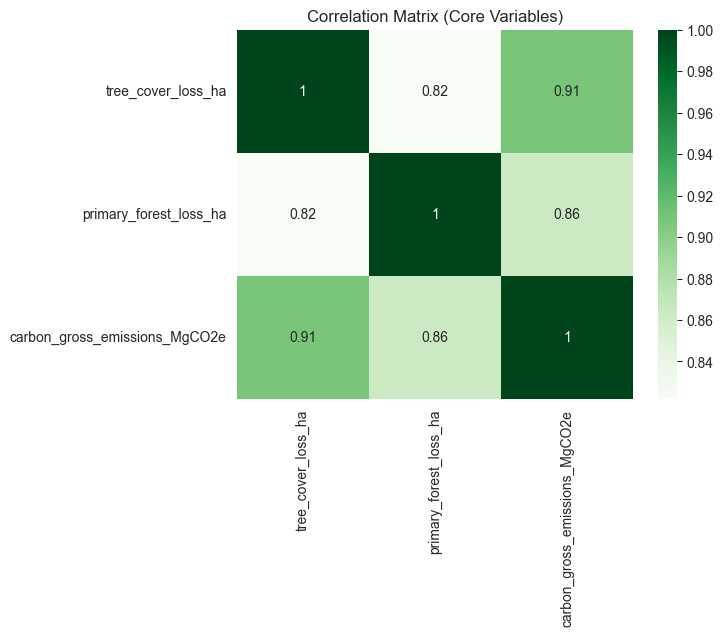

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ["tree_cover_loss_ha", "primary_forest_loss_ha",
            "carbon_gross_emissions_MgCO2e"]

corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="Greens")
plt.title("Correlation Matrix (Core Variables)")
plt.show()